## Task 03 - Image Analysis

Name: Felipe Pereira

### IMPORTANT: If you are using pyenv, you must define the path to it, otherwise leave it commented

In [1]:
import sys
sys.path.append('/home/felipe/python_envs/env_felipe/lib/python3.8/site-packages')

### IMPORTANT: Set these variables

In [2]:
# Folder where the original images are (relative path to notebook location)
originals_folder='plates/originals/'
masks_folder='plates/masks/'

### IMPORTANT: Create this folder in operating system first
# Folder where the output images will be created (relative path to notebook location) 
output_folder='output/'

# Filter to use when processing images

## One specific image (for debugging)
image_filter='0200.png'

## All images
#image_filter='.png'

### Libraries

In [3]:
# Importing libraries that were used in this notebook
import cv2
import glob, os
import numpy as np
import pandas as pd

from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse

import skimage.measure

from PIL import Image
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image

import sys
from time import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from skimage.data import lfw_subset
from skimage.transform import integral_image
from skimage.feature import haar_like_feature
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature

### Dataset composition

In [4]:
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)

                # Writing output            
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '.png'                
                cv2.imwrite(output_folder + patch_output,ycrcb_patch)

                # Updating height loop var
                height_img = height_img + stride_pixels
                patch_number = patch_number + 1

                # Debugging                
                #print('Height: {}'.format(height_img))
                #print('Width: {}'.format(width_img))
                #print('Patch Number: {}'.format(patch_number))

            # Updating width loop var
            width_img = width_img + stride_pixels               
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


### Batch Normalization

In [5]:
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                #c1_array = np.asarray(rgb_patch[:,:,0])
                #c2_array = np.maximum(0, np.asarray(rgb_patch[:,:,1])+100 )
                #c3_array = np.maximum(0, np.asarray(rgb_patch[:,:,2])+200 )
                
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                c2_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,1])+100 )
                c3_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,2])+200 )
        
                # Getting array metrics        
                #print('Channel 1 - Metrics:')
                #print('Sum of pixels: {}'.format(np.sum(c1_array)))
                #print('Mean of pixels: {}'.format(np.mean(c1_array)))
                #print('Std of pixels: {}'.format(np.std(c1_array)))
                #print('Array shape: {}'.format(c1_array.shape))
                #print(' ')
                #print('Channel 2 - Metrics:')
                #print('Sum of pixels: {}'.format(np.sum(c2_array)))
                #print('Mean of pixels: {}'.format(np.mean(c2_array)))
                #print('Std of pixels: {}'.format(np.std(c2_array)))
                #print(' ')
                #print('Channel 3 - Metrics:')
                #print('Sum of pixels: {}'.format(np.sum(c3_array)))
                #print('Mean of pixels: {}'.format(np.mean(c3_array)))
                #print('Std of pixels: {}'.format(np.std(c3_array)))
                #print(' ')
                
                # Normalization
                c1_array_mm = c1_array - c1_array.mean(axis=1, keepdims=True)
                c1_array_normalized = c1_array_mm / c1_array.std(axis=1, keepdims=True)
                
                c2_array_mm = c2_array - c2_array.mean(axis=1, keepdims=True)
                c2_array_normalized = c2_array_mm / c2_array.std(axis=1, keepdims=True)
                
                c3_array_mm = c3_array - c3_array.mean(axis=1, keepdims=True)
                c3_array_normalized = c3_array_mm / c1_array.std(axis=1, keepdims=True)
                
                # Getting array metrics  
                #print('Channel 1 Normalized - Metrics:')
                #print('Sum of pixels: {}'.format(np.sum(c1_array_normalized)))
                #print('Mean of pixels: {}'.format(np.mean(c1_array_normalized)))
                #print('Std of pixels: {}'.format(np.std(c1_array_normalized)))
                #print('Array shape: {}'.format(c1_array_normalized.shape))
                #print(' ')
                #print('Channel 2 Normalized - Metrics:')
                #print('Sum of pixels: {}'.format(np.sum(c2_array_normalized)))
                #print('Mean of pixels: {}'.format(np.mean(c2_array_normalized)))
                #print('Std of pixels: {}'.format(np.std(c2_array_normalized)))
                #print(' ')
                #print('Channel 3 Normalized - Metrics:')
                #print('Sum of pixels: {}'.format(np.sum(c3_array_normalized)))
                #print('Mean of pixels: {}'.format(np.mean(c3_array_normalized)))
                #print('Std of pixels: {}'.format(np.std(c3_array_normalized)))
                #print(' ')
                
                # Writing output            
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_c1_normalized.png'                
                Image.fromarray(c1_array_normalized).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_c2_normalized.png'                
                Image.fromarray(c2_array_normalized).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_c3_normalized.png'                
                Image.fromarray(c3_array_normalized).convert('RGB').save(output_folder + patch_output)
                
                #cv2.imwrite('output/' + patch_output,gr_im)                
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels       
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png


<ipython-input-5-9aae958f1a8c>:83: RuntimeWarning: invalid value encountered in true_divide
  c2_array_normalized = c2_array_mm / c2_array.std(axis=1, keepdims=True)


Processed file: orig_0200.png


### Random Kernels

In [6]:
# Creating random matrices
kernel_01 = np.random.rand(3,3)
kernel_01_mean = kernel_01 - kernel_01.mean(axis=1, keepdims=True)

kernel_02 = np.random.rand(3,3)
kernel_02_mean = kernel_02 - kernel_02.mean(axis=1, keepdims=True)

kernel_03 = np.random.rand(3,3)
kernel_03_mean = kernel_03 - kernel_03.mean(axis=1, keepdims=True)

In [7]:
kernel_01

array([[0.65507601, 0.76879375, 0.86270436],
       [0.89749361, 0.207149  , 0.70822513],
       [0.68349217, 0.85669365, 0.38034585]])

In [8]:
kernel_01_mean

array([[-0.10711536,  0.00660238,  0.10051298],
       [ 0.29320437, -0.39714025,  0.10393588],
       [ 0.04331494,  0.21651643, -0.25983137]])

In [9]:
kernel_02

array([[0.67745968, 0.74206207, 0.7133183 ],
       [0.26461547, 0.97040056, 0.96187903],
       [0.19133703, 0.94372451, 0.47845603]])

In [10]:
kernel_03

array([[0.64564039, 0.07676898, 0.91836536],
       [0.41382196, 0.16411244, 0.35683841],
       [0.90897326, 0.45910437, 0.0410052 ]])

In [11]:
kernel_sobel = np.array([[-1, 0, -1], [-2, 0, 2], [-1, 0, 1]])
kernel_sobel

array([[-1,  0, -1],
       [-2,  0,  2],
       [-1,  0,  1]])

### Convolution

In [12]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [13]:
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                c2_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,1])+100 )
                c3_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,2])+200 )
                
                # Convolutions - Random
                conv_01 = convolve2D(c1_array,kernel_01_mean)
                conv_02 = convolve2D(c2_array,kernel_02_mean)
                conv_03 = convolve2D(c3_array,kernel_03_mean)
                
                # Convolutions - Sobel
                #conv_sobel_01 = convolve2D(c1_array,kernel_sobel)
                #conv_sobel_02 = convolve2D(c2_array,kernel_sobel)
                #conv_sobel_03 = convolve2D(c3_array,kernel_sobel)                
                
                # Writing output            
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_conv_01.png'                
                Image.fromarray(conv_01).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_conv_02.png'                
                Image.fromarray(conv_02).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_conv_03.png'                
                Image.fromarray(conv_03).convert('RGB').save(output_folder + patch_output)                        
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels       
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


### ReLu

In [14]:
def relu(X):
   return np.maximum(0,X)

In [15]:
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                c2_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,1])+100 )
                c3_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,2])+200 )
                
                # Convolutions - Sobel
                conv_sobel_01 = convolve2D(c1_array,kernel_01_mean)
                conv_sobel_02 = convolve2D(c2_array,kernel_02_mean)
                conv_sobel_03 = convolve2D(c3_array,kernel_03_mean)                
                           
                # ReLu
                relu_01 = relu(conv_sobel_01)
                relu_02 = relu(conv_sobel_02)
                relu_03 = relu(conv_sobel_03)                
                
                # Writing output            
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_relu_01.png'                
                Image.fromarray(relu_01).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_relu_02.png'                
                Image.fromarray(relu_02).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_relu_03.png'                
                Image.fromarray(relu_03).convert('RGB').save(output_folder + patch_output)                        
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels       
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


### Super Pixels

<ipython-input-16-590e1dcd6ae2>:16: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(image, n_segments = numSegments, sigma = 5, convert2lab = True)


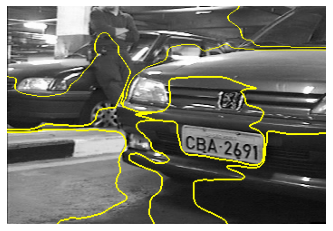

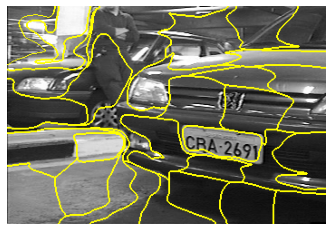

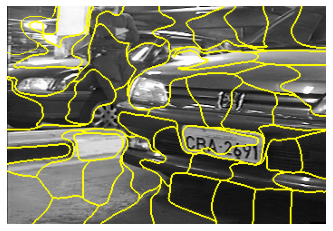

In [16]:
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
    
        # Reading image
        image_orig = cv2.imread(originals_folder + file_name,cv2.IMREAD_COLOR)
        
        # load the image and convert it to a floating point data type
        image = img_as_float(image_orig)
        
        # loop over the number of segments
        for numSegments in (10, 30, 50):
            
            # apply SLIC and extract (approximately) the supplied number
            # of segments
            segments = slic(image, n_segments = numSegments, sigma = 5, convert2lab = True)
            
            # show the output of SLIC
            fig = plt.figure("Superpixels -- %d segments" % (numSegments))
            ax = fig.add_subplot(1, 1, 1)
            ax.imshow(mark_boundaries(image, segments))
            plt.axis("off")
            
        # show the plots
        plt.show()

### Max Pooling after ReLu

In [17]:
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                c2_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,1])+100 )
                c3_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,2])+200 )
                
                # Convolutions - Sobel
                conv_sobel_01 = convolve2D(c1_array,kernel_01_mean)
                conv_sobel_02 = convolve2D(c2_array,kernel_02_mean)
                conv_sobel_03 = convolve2D(c3_array,kernel_03_mean)                
                           
                # ReLu
                relu_01 = relu(conv_sobel_01)
                relu_02 = relu(conv_sobel_02)
                relu_03 = relu(conv_sobel_03)        
                
                # Max Pooling                
                pool_01 = skimage.measure.block_reduce(relu_01, (3,3), np.max)
                pool_02 = skimage.measure.block_reduce(relu_02, (3,3), np.max)
                pool_03 = skimage.measure.block_reduce(relu_03, (3,3), np.max)
                
                # Writing output            
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_pool_max_01.png'                
                Image.fromarray(pool_01).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_pool_max_02.png'                
                Image.fromarray(pool_02).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_pool_max_03.png'                
                Image.fromarray(pool_03).convert('RGB').save(output_folder + patch_output)                        
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels               
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


### Average Pooling after ReLu

In [18]:
for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                c2_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,1])+100 )
                c3_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,2])+200 )
                
                # Convolutions - Sobel
                conv_sobel_01 = convolve2D(c1_array,kernel_01_mean)
                conv_sobel_02 = convolve2D(c2_array,kernel_02_mean)
                conv_sobel_03 = convolve2D(c3_array,kernel_03_mean)                
                           
                # ReLu
                relu_01 = relu(conv_sobel_01)
                relu_02 = relu(conv_sobel_02)
                relu_03 = relu(conv_sobel_03)        
                
                # Max Pooling                
                pool_01 = skimage.measure.block_reduce(relu_01, (3,3), np.mean)
                pool_02 = skimage.measure.block_reduce(relu_02, (3,3), np.mean)
                pool_03 = skimage.measure.block_reduce(relu_03, (3,3), np.mean)
                
                # Writing output            
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_pool_mean_01.png'                
                Image.fromarray(pool_01).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_pool_mean_02.png'                
                Image.fromarray(pool_02).convert('RGB').save(output_folder + patch_output)
                
                patch_output = file_name.replace('.png','') + '_p' + str(patch_number) + '_pool_mean_03.png'                
                Image.fromarray(pool_03).convert('RGB').save(output_folder + patch_output)                        
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels         
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


### Haar-Like

In [19]:
def extract_feature_image(img, feature_type, feature_coord=None):
    """Extract the haar feature for the current image"""
    ii = integral_image(img)
            
    return haar_like_feature(ii, 0, 0, ii.shape[0], ii.shape[1],
                             feature_type=feature_type,
                             feature_coord=feature_coord)

In [20]:
feature_types = ['type-3-x']

for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
    
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image
                                
                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                
                # Haar Like
                #haar_patch = extract_feature_image(c1_array, feature_types)
                ii = integral_image(c1_array)
                features = haar_like_feature(ii, 0, 0, ii.shape[1], ii.shape[0], feature_types)
                print('Features do patch: {}'.format(patch_number))                         
                print(features)
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels       
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Features do patch: 1
[ -91 -186 -294 ...  -83  -66  -59]
Features do patch: 2
[-159 -324 -456 ...  -39  -37  -35]
Features do patch: 3
[-125 -289 -316 ...  -61  -64  -48]
Features do patch: 4
[-141 -212 -285 ... -161 -154 -154]
Features do patch: 5
[-216 -424 -622 ... -219 -217 -219]
Features do patch: 6
[ -66 -132 -191 ... -192 -193 -193]
Features do patch: 7
[ -57 -101 -166 ... -150 -149 -148]
Features do patch: 8
[ -38  -80 -112 ... -144 -138 -149]
Features do patch: 9
[ -33  -72 -113 ... -136 -145 -145]
Features do patch: 10
[-236 -488 -715 ... -133 -128 -126]
Features do patch: 11
[ -96 -211 -223 ...  -88  -86  -80]
Features do patch: 12
[ -46  -85 -125 ...  -88  -86  -80]
Features do patch: 13
[ -93 -190 -304 ...  -40  -42  -46]
Features do patch: 14
[-250 -504 -759 ...  -14  -60  -89]
Features do patch: 15
[-121 -318 -348 ...  -99  -90  -86]
Features do patch: 16
[ -67 -131 -169 ... -151 -151 -152]
Features do patch: 17
[-186 -356 -544 ... -218 -21

Features do patch: 142
[ -35  -76 -104 ...  -23  -18  -17]
Features do patch: 143
[-28 -58 -93 ... -24 -25 -26]
Features do patch: 144
[ -54 -102 -148 ...  -24  -25  -26]
Features do patch: 145
[-253 -507 -757 ...  -24  -24  -21]
Features do patch: 146
[ -77 -159 -241 ...  -87 -100  -89]
Features do patch: 147
[-196 -398 -607 ...  -70  -75  -68]
Features do patch: 148
[-163 -322 -456 ...  -13   -9    0]
Features do patch: 149
[-252 -502 -752 ...  -79  -75  -29]
Features do patch: 150
[ -81 -161 -234 ... -139 -140 -126]
Features do patch: 151
[ -72 -157 -222 ...  -29  -29  -29]
Features do patch: 152
[ -84 -114 -159 ...  -23  -28  -27]
Features do patch: 153
[ -65 -135 -201 ...  -16  -19  -18]
Features do patch: 154
[ -50 -100 -170 ...  -17  -27  -21]
Features do patch: 155
[-22 -56 -97 ... -27 -26 -28]
Features do patch: 156
[ -59 -119 -192 ...  -27  -26  -28]
Features do patch: 157
[-253 -502 -737 ...  -25  -25  -27]
Features do patch: 158
[ -90 -163 -269 ...  -74  -67  -62]
Features 

## Modeling

In this section, we will train the same model (SVM Classifier) with different extracted features (e.g.: Normalization, ReLu, Pooling, haar-like, etc) in order to understand how well the model learns from each type of feature or feature combination.

In [21]:
# Creating dataframe for object manipulation
df_raw_number = pd.DataFrame()
df_raw_class = pd.DataFrame()
df_raw_proportion = pd.DataFrame()

In [22]:
# Preparing dataset
for file_name in os.listdir(masks_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(masks_folder + file_name,cv2.IMREAD_COLOR)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                #Populating dataframes
                if float(np.sum(patch_image).astype(int)/1975995) >= float(0.50) :
                    print('Patch Number: {}'.format(patch_number))
                    print('Positive')
                    df_raw_number = df_raw_number.append([patch_number])
                    df_raw_class = df_raw_class.append([1])
                    df_raw_proportion = df_raw_proportion.append([float(np.sum(patch_image).astype(int)/1975995)])                    
                else:
                    print('Patch Number: {}'.format(patch_number))
                    print('Negative')
                    df_raw_number = df_raw_number.append([patch_number])
                    df_raw_class = df_raw_class.append([0])
                    df_raw_proportion = df_raw_proportion.append([float(np.sum(patch_image).astype(int)/1975995)])                    
                
                # Debugging                            
                #print('Patch Number: {}'.format(patch_number))
                #print(type(pixel_sum))
                #print('Sum: {}'.format(np.sum(patch_image).astype(int)))
                #print('Percentage: {}'.format(np.sum(patch_image).astype(int)/1975995))
                #print('Height: {}'.format(height_img))
                #print('Width: {}'.format(width_img))                
                
                #### Updating height loop var
                height_img = height_img + stride_pixels
                patch_number = patch_number + 1                

            # Updating width loop var
            width_img = width_img + stride_pixels               
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: mask_0200.png
Patch Number: 1
Negative
Patch Number: 2
Negative
Patch Number: 3
Negative
Patch Number: 4
Negative
Patch Number: 5
Negative
Patch Number: 6
Negative
Patch Number: 7
Negative
Patch Number: 8
Negative
Patch Number: 9
Negative
Patch Number: 10
Negative
Patch Number: 11
Negative
Patch Number: 12
Negative
Patch Number: 13
Negative
Patch Number: 14
Negative
Patch Number: 15
Negative
Patch Number: 16
Negative
Patch Number: 17
Negative
Patch Number: 18
Negative
Patch Number: 19
Negative
Patch Number: 20
Negative
Patch Number: 21
Negative
Patch Number: 22
Negative
Patch Number: 23
Negative
Patch Number: 24
Negative
Patch Number: 25
Negative
Patch Number: 26
Negative
Patch Number: 27
Negative
Patch Number: 28
Negative
Patch Number: 29
Negative
Patch Number: 30
Negative
Patch Number: 31
Negative
Patch Number: 32
Negative
Patch Number: 33
Negative
Patch Number: 34
Negative
Patch Number: 35
Negative
Patch Number: 36
Negative
Patch Number: 37
Negative
Patch Number: 38

### Model evaluation with raw data

In [23]:
df_raw_features = pd.DataFrame()

for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                #Populating dataframes
                df_raw_features = df_raw_features.append([patch_image.flatten()])                    
                
                # Debugging                            
                #print('Patch Number: {}'.format(patch_number))
                #print(type(pixel_sum))
                #print('Sum: {}'.format(np.sum(patch_image).astype(int)))
                #print('Percentage: {}'.format(np.sum(patch_image).astype(int)/1975995))
                #print('Height: {}'.format(height_img))
                #print('Width: {}'.format(width_img))                
                
                #### Updating height loop var
                height_img = height_img + stride_pixels
                patch_number = patch_number + 1                

            # Updating width loop var
            width_img = width_img + stride_pixels               
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


In [24]:
# Managing dataframe
#df_raw_number.drop(axis=1, labels=[0], inplace=True, errors='ignore')
df_raw_number.columns = ['patch_number']
df_raw_number.reset_index(inplace=True, drop=True)
df_raw_number.head()

,patch_number
0,1
1,2
2,3
3,4
4,5


In [25]:
# Managing dataframe
#df_raw_class.drop(axis=1, labels=[0], inplace=True, errors='ignore')
df_raw_class.columns = ['class']
df_raw_class.reset_index(inplace=True, drop=True)
df_raw_class.head()

,class
0,0
1,0
2,0
3,0
4,0


In [26]:
# Managing dataframe
#df_raw_proportion.drop(axis=1, labels=[0], inplace=True, errors='ignore')
df_raw_proportion.columns = ['plate_proportion']
df_raw_proportion.reset_index(inplace=True, drop=True)
df_raw_proportion.head()

,plate_proportion
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [27]:
# Managing dataframe
df_raw_features.reset_index(inplace=True, drop=True)
df_raw_features.head()

,0,1,2,3,4,5,6,7,8,9,...,8271,8272,8273,8274,8275,8276,8277,8278,8279,8280
0,87,91,95,93,96,100,103,104,103,100,...,98.0,99.0,99.0,101.0,92.0,77.0,72.0,78.0,72.0,53.0
1,155,167,171,166,171,168,162,156,150,146,...,41.0,40.0,38.0,38.0,37.0,38.0,37.0,38.0,38.0,35.0
2,162,91,54,67,77,80,82,78,73,74,...,36.0,39.0,39.0,39.0,37.0,38.0,43.0,66.0,87.0,69.0
3,134,98,105,110,101,94,90,84,79,76,...,158.0,156.0,153.0,156.0,160.0,158.0,155.0,158.0,157.0,153.0
4,221,217,212,194,197,195,189,185,184,178,...,218.0,218.0,218.0,219.0,219.0,218.0,218.0,219.0,218.0,218.0


In [28]:
# Creating full dataframe
frames = [df_raw_number, df_raw_class, df_raw_proportion,df_raw_features]
df_raw = pd.concat(frames, axis=1)
df_raw.head()

,patch_number,class,plate_proportion,0,1,2,3,4,5,6,...,8271,8272,8273,8274,8275,8276,8277,8278,8279,8280
0,1,0,0.0,87,91,95,93,96,100,103,...,98.0,99.0,99.0,101.0,92.0,77.0,72.0,78.0,72.0,53.0
1,2,0,0.0,155,167,171,166,171,168,162,...,41.0,40.0,38.0,38.0,37.0,38.0,37.0,38.0,38.0,35.0
2,3,0,0.0,162,91,54,67,77,80,82,...,36.0,39.0,39.0,39.0,37.0,38.0,43.0,66.0,87.0,69.0
3,4,0,0.0,134,98,105,110,101,94,90,...,158.0,156.0,153.0,156.0,160.0,158.0,155.0,158.0,157.0,153.0
4,5,0,0.0,221,217,212,194,197,195,189,...,218.0,218.0,218.0,219.0,219.0,218.0,218.0,219.0,218.0,218.0


In [29]:
# Splitting X and Y - Excluding from training plates that are below .50 threshold
df_model = df_raw.dropna()

#X = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))].drop(['patch_number','class','plate_proportion'], axis=1)
#y = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))]['class']

X = df_model.drop(['patch_number','class','plate_proportion'], axis=1)
y = df_model['class']

In [30]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
# Training model
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(LinearSVC(random_state=0, C=100))
clf.fit(X_train, y_train)

Pipeline(steps=[('linearsvc', LinearSVC(C=100, random_state=0))])

In [32]:
# Making prediction
y_pred = clf.predict(X_test)

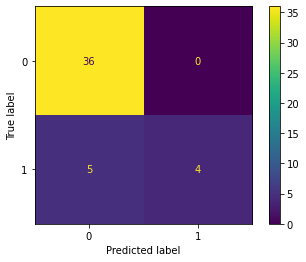

In [33]:
# Assessing confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [34]:
# Evaluating model performance
from sklearn.metrics import classification_report
target_names = ['not_plate', 'plate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not_plate       0.88      1.00      0.94        36
       plate       1.00      0.44      0.62         9

    accuracy                           0.89        45
   macro avg       0.94      0.72      0.78        45
weighted avg       0.90      0.89      0.87        45



### Model evaluation with features from Convolution (Random Kernel  + Normalization + ReLu + Max Pooling)

In [35]:
df_conv_features = pd.DataFrame()

for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                c2_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,1])+100 )
                c3_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,2])+200 )
                
                # Convolutions - Sobel
                conv_sobel_01 = convolve2D(c1_array,kernel_01_mean)
                conv_sobel_02 = convolve2D(c2_array,kernel_02_mean)
                conv_sobel_03 = convolve2D(c3_array,kernel_03_mean)                
                           
                # ReLu
                relu_01 = relu(conv_sobel_01)
                relu_02 = relu(conv_sobel_02)
                relu_03 = relu(conv_sobel_03)        
                
                # Max Pooling                
                pool_01 = skimage.measure.block_reduce(relu_01, (3,3), np.max)
                pool_02 = skimage.measure.block_reduce(relu_02, (3,3), np.max)
                pool_03 = skimage.measure.block_reduce(relu_03, (3,3), np.max)
                
                #Populating dataframes
                df_conv_features = df_conv_features.append([pool_01.flatten()])                                    
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels               
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


In [36]:
# Managing dataframe
df_conv_features.reset_index(inplace=True, drop=True)
df_conv_features.head()

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,1.419761,2.160910,0.974620,2.726917,0.675088,0.672152,2.327610,1.870694,2.289597,5.542437,...,1.617113,1.914775,1.432096,1.159988,1.314980,1.427702,0.360344,1.330843,6.552132,3.018046
1,7.187933,3.597360,2.028147,6.369036,24.861432,0.559411,0.638846,0.519429,0.787435,0.931589,...,1.060554,0.813712,2.865257,0.231697,2.798642,0.637517,0.085340,0.407684,1.443312,2.022480
2,6.937777,3.633698,7.200889,7.184029,12.346308,11.856064,7.510488,19.611543,13.129827,10.573610,...,0.570515,1.457922,0.770446,0.000000,0.255521,1.024004,0.812397,2.192324,6.088933,8.311189
3,10.131745,6.590023,2.582960,7.927858,6.589740,3.381129,7.697333,4.974301,3.956889,7.019824,...,0.000000,0.777208,2.099636,0.716587,0.903730,1.796465,1.449107,0.152114,0.601580,0.444807
4,18.792982,7.200856,1.054262,2.376241,1.107369,1.277138,1.537296,7.996200,6.018893,0.397297,...,0.422764,2.311894,8.700380,21.994593,3.332290,0.261957,1.230778,0.779260,0.427568,0.755669


In [37]:
# Creating full dataframe
frames = [df_raw_number, df_raw_class, df_raw_proportion,df_conv_features]
df = pd.concat(frames, axis=1)
df.head()

,patch_number,class,plate_proportion,0,1,2,3,4,5,6,...,890,891,892,893,894,895,896,897,898,899
0,1,0,0.0,1.419761,2.160910,0.974620,2.726917,0.675088,0.672152,2.327610,...,1.617113,1.914775,1.432096,1.159988,1.314980,1.427702,0.360344,1.330843,6.552132,3.018046
1,2,0,0.0,7.187933,3.597360,2.028147,6.369036,24.861432,0.559411,0.638846,...,1.060554,0.813712,2.865257,0.231697,2.798642,0.637517,0.085340,0.407684,1.443312,2.022480
2,3,0,0.0,6.937777,3.633698,7.200889,7.184029,12.346308,11.856064,7.510488,...,0.570515,1.457922,0.770446,0.000000,0.255521,1.024004,0.812397,2.192324,6.088933,8.311189
3,4,0,0.0,10.131745,6.590023,2.582960,7.927858,6.589740,3.381129,7.697333,...,0.000000,0.777208,2.099636,0.716587,0.903730,1.796465,1.449107,0.152114,0.601580,0.444807
4,5,0,0.0,18.792982,7.200856,1.054262,2.376241,1.107369,1.277138,1.537296,...,0.422764,2.311894,8.700380,21.994593,3.332290,0.261957,1.230778,0.779260,0.427568,0.755669


In [38]:
# Splitting X and Y - Excluding from training plates that are below .50 threshold
df_model = df.dropna()

#X = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))].drop(['patch_number','class','plate_proportion'], axis=1)
#y = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))]['class']

X = df_model.drop(['patch_number','class','plate_proportion'], axis=1)
y = df_model['class']

In [39]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
# Training model
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(LinearSVC(random_state=0, C=100))
clf.fit(X_train, y_train)

Pipeline(steps=[('linearsvc', LinearSVC(C=100, random_state=0))])

In [41]:
# Making predictions
y_pred = clf.predict(X_test)

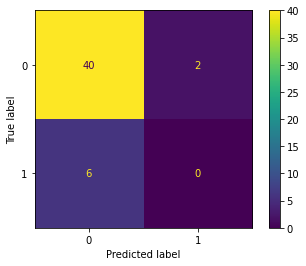

In [42]:
# Assessing confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [43]:
# Evaluating model performance
from sklearn.metrics import classification_report
target_names = ['not_plate', 'plate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not_plate       0.87      0.95      0.91        42
       plate       0.00      0.00      0.00         6

    accuracy                           0.83        48
   macro avg       0.43      0.48      0.45        48
weighted avg       0.76      0.83      0.80        48



### Model evaluation with features from Convolution (Sobel Kernel  + Normalization + ReLu + Max Pooling)

In [45]:
df_conv_features = pd.DataFrame()

for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
        
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image

                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                c2_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,1])+100 )
                c3_array = np.maximum(0, np.asarray(ycrcb_patch[:,:,2])+200 )
                
                # Convolutions - Sobel
                conv_sobel_01 = convolve2D(c1_array,kernel_sobel)
                conv_sobel_02 = convolve2D(c2_array,kernel_sobel)
                conv_sobel_03 = convolve2D(c3_array,kernel_sobel)                
                           
                # ReLu
                relu_01 = relu(conv_sobel_01)
                relu_02 = relu(conv_sobel_02)
                relu_03 = relu(conv_sobel_03)        
                
                # Max Pooling                
                pool_01 = skimage.measure.block_reduce(relu_01, (3,3), np.max)
                pool_02 = skimage.measure.block_reduce(relu_02, (3,3), np.max)
                pool_03 = skimage.measure.block_reduce(relu_03, (3,3), np.max)
                
                #Populating dataframes
                df_conv_features = df_conv_features.append([pool_01.flatten()])                                    
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels               
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

Processing file: orig_0200.png
Processed file: orig_0200.png


In [46]:
# Managing dataframe
df_conv_features.reset_index(inplace=True, drop=True)
df_conv_features.head()

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Creating full dataframe
frames = [df_raw_number, df_raw_class, df_raw_proportion,df_conv_features]
df = pd.concat(frames, axis=1)
df.head()

,patch_number,class,plate_proportion,0,1,2,3,4,5,6,...,890,891,892,893,894,895,896,897,898,899
0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,0.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Splitting X and Y - Excluding from training plates that are below .50 threshold
df_model = df.dropna()

#X = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))].drop(['patch_number','class','plate_proportion'], axis=1)
#y = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))]['class']

X = df_model.drop(['patch_number','class','plate_proportion'], axis=1)
y = df_model['class']

In [49]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
# Training model
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(LinearSVC(random_state=0, C=100))
clf.fit(X_train, y_train)

Pipeline(steps=[('linearsvc', LinearSVC(C=100, random_state=0))])

In [51]:
# Making predictions
y_pred = clf.predict(X_test)

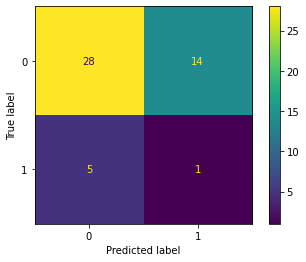

In [52]:
# Assessing confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [53]:
# Evaluating model performance
from sklearn.metrics import classification_report
target_names = ['not_plate', 'plate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not_plate       0.85      0.67      0.75        42
       plate       0.07      0.17      0.10         6

    accuracy                           0.60        48
   macro avg       0.46      0.42      0.42        48
weighted avg       0.75      0.60      0.67        48



### Model evaluation with features from haar-like (Meu computador não conseguiu terminar o processamento, tentei várias vezes, mas ele trava)

In [ ]:
df_haar_features = pd.DataFrame()
feature_types = ['type-3-x']

for file_name in os.listdir(originals_folder):
    
    if file_name.endswith(image_filter):
    
        # Looping through files
        print('Processing file: {}'.format(file_name))
    
        # Reading image
        image = cv2.imread(originals_folder + file_name,cv2.IMREAD_GRAYSCALE)

        # Setting initial patch center    
        width_img=50

        # Setting final dimensions
        last_height_img=225
        last_width_img=325
        #last_height_img=75
        #last_width_img=50

        # Setting stride
        stride_pixels=15

        # Defining patch number
        patch_number=1

        while width_img <= last_width_img:

            # Setting initial patch center    
            height_img=50 

            while height_img <= last_height_img:                   

                # Defining some values
                patch_center = np.array([height_img, width_img])        
                patch_scale = 0.38

                # Calc patch position and extract the patch
                smaller_dim = np.min(image.shape[0:2])
                patch_size = int(patch_scale * smaller_dim)
                patch_x = int(patch_center[0] - patch_size / 2.)
                patch_y = int(patch_center[1] - patch_size / 2.)
                patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

                # Transforming gray scalte to bgr
                rgb_patch = cv2.cvtColor(patch_image, cv2.COLOR_GRAY2BGR)
                #rgb_patch = patch_image
                                
                # Transforming bgr to ycrcb
                ycrcb_patch = cv2.cvtColor(rgb_patch, cv2.COLOR_BGR2YCrCb)
        
                # Transforming image into an array
                c1_array = np.asarray(ycrcb_patch[:,:,0])
                
                # Haar Like
                #haar_patch = extract_feature_image(c1_array, feature_types)
                ii = integral_image(c1_array)
                features = haar_like_feature(ii, 0, 0, ii.shape[1], ii.shape[0], feature_types)
                
                #Populating dataframes
                df_haar_features = df_conv_features.append([features.flatten()])                                    
                
                # Updating height loop var
                height_img = height_img + stride_pixels                                
                patch_number = patch_number + 1

            # Updating width loop var
            width_img = width_img + stride_pixels       
        
        # Looping through files
        print('Processed file: {}'.format(file_name))

In [ ]:
# Managing dataframe
df_haar_features.reset_index(inplace=True, drop=True)
df_haar_features.head()

In [ ]:
# Creating full dataframe
frames = [df_raw_number, df_raw_class, df_raw_proportion,df_haar_features]
df = pd.concat(frames, axis=1)
df.head()

In [ ]:
# Splitting X and Y - Excluding from training plates that are below .50 threshold
df_model = df.dropna()

#X = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))].drop(['patch_number','class','plate_proportion'], axis=1)
#y = df_model[(df_model.plate_proportion == 0) | (df_model.plate_proportion >= float(0.50))]['class']

X = df_model.drop(['patch_number','class','plate_proportion'], axis=1)
y = df_model['class']

In [ ]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Training model
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(LinearSVC(random_state=0, C=100))
clf.fit(X_train, y_train)

In [ ]:
# Making predictions
y_pred = clf.predict(X_test)

In [ ]:
# Assessing confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
# Evaluating model performance
from sklearn.metrics import classification_report
target_names = ['not_plate', 'plate']
print(classification_report(y_test, y_pred, target_names=target_names))